In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
y = pd.read_table('datas/bionew.edges', sep=' ')
y

,S,T
0,2,36
1,2,857
2,2,1648
3,2,2010
4,2,2025
...,...,...
4475,2110,2110
4476,2111,2112
4477,2112,2111
4478,2113,2113


In [3]:
#파일의 내용을 엣지리스트로 만들기
edgeslist: list = [(s, t) for s, t in y.to_numpy()]
print(edgeslist)

[(2, 36), (2, 857), (2, 1648), (2, 2010), (2, 2025), (3, 235), (3, 1377), (3, 1489), (4, 672), (4, 1444), (6, 857), (7, 42), (7, 1126), (8, 536), (9, 420), (9, 648), (9, 1646), (10, 1166), (10, 1183), (10, 1621), (11, 614), (11, 680), (11, 1000), (12, 326), (13, 1417), (14, 109), (14, 233), (14, 427), (14, 871), (14, 909), (14, 1057), (14, 1352), (14, 1739), (14, 1754), (15, 123), (15, 366), (15, 687), (15, 909), (15, 1125), (15, 1548), (15, 1715), (15, 1733), (15, 1734), (15, 1735), (15, 1736), (17, 150), (17, 631), (17, 819), (17, 1074), (17, 1843), (18, 482), (18, 1365), (19, 1587), (21, 113), (21, 319), (22, 1093), (22, 1255), (22, 1606), (23, 506), (24, 819), (24, 1219), (24, 1789), (24, 1843), (24, 1974), (26, 127), (26, 168), (27, 27), (27, 580), (28, 293), (29, 547), (29, 906), (29, 1536), (29, 1731), (29, 1789), (29, 1966), (29, 1967), (30, 1498), (31, 1027), (32, 874), (33, 248), (33, 305), (33, 424), (33, 618), (33, 1169), (33, 1601), (34, 640), (34, 1583), (35, 843), (36, 2

In [4]:
node_count = y['S'].value_counts()
print(node_count)
print(type(node_count))

224     56
1183    38
150     30
1219    29
819     29
        ..
958      1
956      1
952      1
949      1
2114     1
Name: S, Length: 1870, dtype: int64
<class 'pandas.core.series.Series'>


In [5]:
nodeslist = [(x, {'count':node_count[x]}) for x in node_count.index]

In [6]:
#엣지리스트 확인하기
nodeslist.reverse()
print(nodeslist)
print(len(nodeslist))

[(2114, {'count': 1}), (949, {'count': 1}), (952, {'count': 1}), (956, {'count': 1}), (958, {'count': 1}), (961, {'count': 1}), (962, {'count': 1}), (966, {'count': 1}), (967, {'count': 1}), (968, {'count': 1}), (970, {'count': 1}), (974, {'count': 1}), (979, {'count': 1}), (981, {'count': 1}), (982, {'count': 1}), (983, {'count': 1}), (944, {'count': 1}), (938, {'count': 1}), (937, {'count': 1}), (933, {'count': 1}), (908, {'count': 1}), (910, {'count': 1}), (911, {'count': 1}), (912, {'count': 1}), (914, {'count': 1}), (916, {'count': 1}), (919, {'count': 1}), (984, {'count': 1}), (921, {'count': 1}), (924, {'count': 1}), (925, {'count': 1}), (926, {'count': 1}), (927, {'count': 1}), (928, {'count': 1}), (930, {'count': 1}), (932, {'count': 1}), (922, {'count': 1}), (987, {'count': 1}), (989, {'count': 1}), (1002, {'count': 1}), (1050, {'count': 1}), (1052, {'count': 1}), (1054, {'count': 1}), (1059, {'count': 1}), (1060, {'count': 1}), (1061, {'count': 1}), (1062, {'count': 1}), (10

In [7]:
nodename = [i[0] if i[1]['count'] >= 20 else None
            for i in nodeslist]
print(nodename)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [8]:
nodesize = [i[1]['count']*100 for i in nodeslist]

In [9]:
import networkx as nx
#그래프 클래스 할당하기
G = nx.Graph()
G.number_of_nodes()

0

In [10]:
#노드리스트 그래프에 추가하기
G.add_nodes_from(nodeslist)

#엣지리스트 그래프에 추가하기
G.add_edges_from(edgeslist)

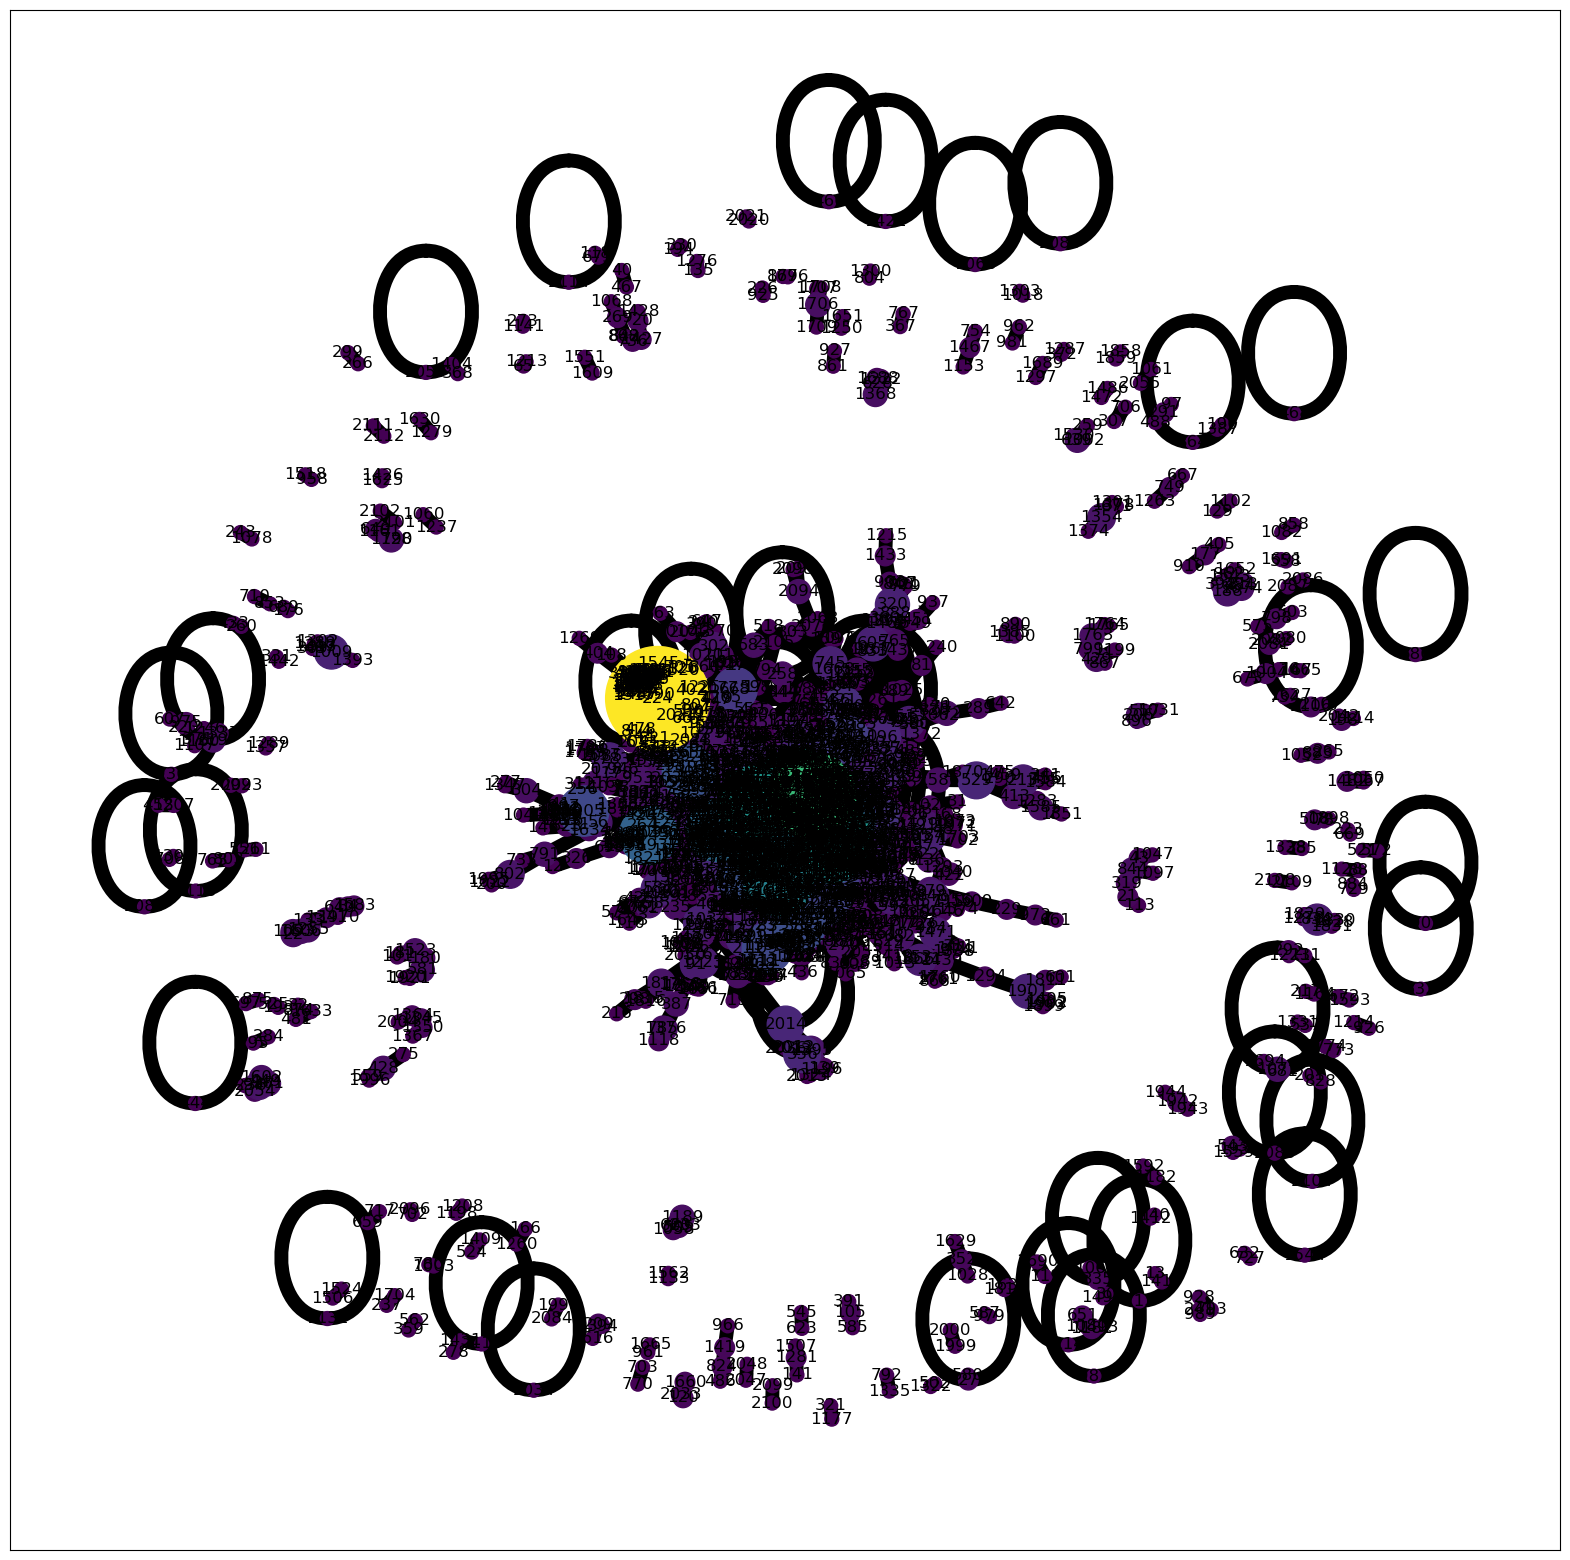

In [11]:
#그래프 그리기
#카운트에 따라 노드 크기 조정
plt.figure(figsize=(20,20))
nx.draw_networkx(G, node_size=nodesize, node_color=nodesize, width=10)